In [4]:
!ls -la /data/books/machine-learning-for-engineers/chapter-02/

total 636
drwxr-xr-x 6 root root    192 Jan  2 16:40 .
drwxr-xr-x 3 root root     96 Jan  2 16:40 ..
-rw-r--r-- 1 root root 620473 Jan  2 16:40 blue_jay.jpg
-rw-r--r-- 1 root root   3716 Jan  2 16:40 iris.csv
-rw-r--r-- 1 root root  17727 Jan  2 16:40 mpg.csv
-rw-r--r-- 1 root root     74 Jan  2 16:40 sample_missing_data.csv


In [35]:
import numpy as np
import scipy.misc
import pandas as pd
import imageio
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [20]:
%%markdown
# Loading a CSV file into a Pandas DataFrame (DF)

# Loading a CSV file into a Pandas DataFrame (DF)

In [6]:
df = pd.read_csv ("/data/books/machine-learning-for-engineers/chapter-02/iris.csv")
#df

In [7]:
print (df.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [8]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [9]:
df['Sepal.Length'].head(3)

0    5.1
1    4.9
2    4.7
Name: Sepal.Length, dtype: float64

In [10]:
print (df["Sepal.Length"].mean())
print (df["Sepal.Length"].var())
print (df["Sepal.Length"].skew())
print (df["Sepal.Length"].kurtosis())

5.84333333333
0.685693512304
0.314910956637
-0.552064041316


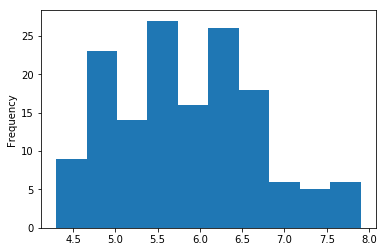

In [11]:
df['Sepal.Length'].plot.hist()

In [19]:
%%markdown
# Loading an image

# Loading an image

(1416, 1920, 3)

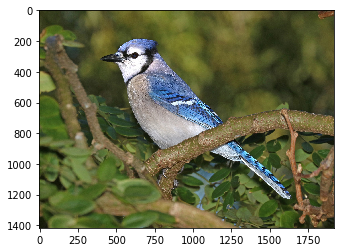

In [12]:
testimg = imageio.imread("/data/books/machine-learning-for-engineers/chapter-02/blue_jay.jpg")
plt.imshow( testimg)
testimg.shape

Text(0.5,1,'Blue channel')

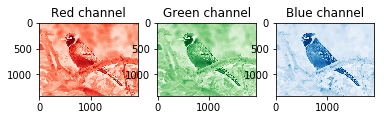

In [13]:
plt.subplot(131)
plt.imshow( testimg[:,:,0], cmap="Reds")
plt.title("Red channel")

plt.subplot(132)
plt.imshow( testimg[:,:,1], cmap="Greens")
plt.title("Green channel")

plt.subplot(133)
plt.imshow( testimg[:,:,2], cmap="Blues")
plt.title("Blue channel")

In [21]:
%%markdown
# Data Preprocessing
## Normalization

# Data Preprocessing
## Normalization

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


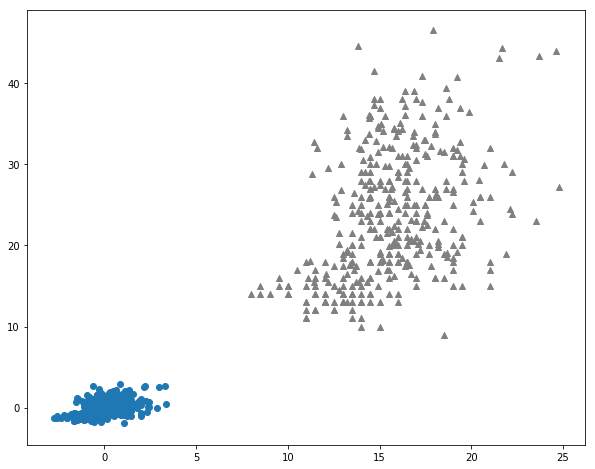

In [15]:
df = pd.read_csv("/data/books/machine-learning-for-engineers/chapter-02/mpg.csv")
plt.figure (figsize = (10,8))
print (df.columns)

partialcolumns = df[['acceleration', 'mpg']]
std_scale = preprocessing.StandardScaler().fit(partialcolumns)
df_std = std_scale.transform (partialcolumns)

plt.scatter (partialcolumns['acceleration'], partialcolumns['mpg'], color="grey", marker='^')
plt.scatter (df_std[:,0], df_std[:,1])

In [31]:
%%markdown
# Error Measurement

# Error Measurement

[[0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]]


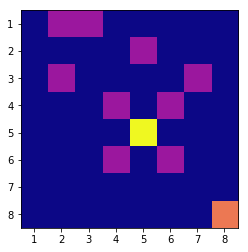

In [39]:
y_true = [8, 5, 6, 8, 5, 3, 1, 6, 4, 2, 5, 3, 1, 4]
y_pred = [8, 5, 6, 8, 5, 2, 3, 4, 4, 5, 5, 7, 2, 6]
cf_mtrx = confusion_matrix(y_true, y_pred)
print (cf_mtrx)

plt.imshow (cf_mtrx, interpolation='nearest', cmap='plasma')
plt.xticks (np.arange(0,8), np.arange(1,9))
plt.yticks (np.arange(0,8), np.arange(1,9))
plt.show()